# Генерация стиля
Байесовский генератор стилей
Испльзуя данные о популярных стилях из файла styles.py написать генератор (можно в виде функции, можно ввите класа generator):

- Использует данные о стилях
- На основе формулы MLE и формулы Байеса о полной вероятности генерировать случайный стиль
- Так же вернуть вероятность генерации данного стиля


In [4]:
import random
import itertools
import numpy as np

from functools import reduce

from styles import styles, styles_count

In [6]:
styles

{'прическа': ['нет волос',
  'длинные в пучок',
  'длинные волнистые',
  'длинные прямые',
  'короткая волнистые',
  'короткая прямые',
  'короткая курчавые'],
 'цвет волос': ['черный',
  'блонд',
  'каштановый',
  'пастельный розовый',
  'рыжий',
  'серебристо серый'],
 'аксесуар': ['нет очков', 'круглые очки', 'солнцезащитные очки'],
 'одежда': ['худи',
  'комбинезон',
  'футболка с круглым вырезом',
  'футболка с V-вырезом'],
 'цвет одежды': ['черный',
  'синий',
  'серый',
  'зеленый',
  'оранжевый',
  'розовый',
  'красный',
  'белый']}

In [7]:
styles_count

{'прическа': [7, 0, 1, 23, 1, 11, 7],
 'цвет волос': [7, 6, 2, 3, 8, 24],
 'аксесуар': [11, 22, 17],
 'одежда': [7, 18, 19, 6],
 'цвет одежды': [4, 5, 6, 8, 6, 8, 7, 6]}

In [8]:
def get_probability(count_list: list) -> list:
    denominator = sum(count_list)

    proba_list = np.array(count_list) / denominator

    return proba_list

In [9]:
styles_probability = {key: get_probability(styles_count[key]) for key in styles_count.keys()}

In [10]:
styles_probability

{'прическа': array([0.14, 0.  , 0.02, 0.46, 0.02, 0.22, 0.14]),
 'цвет волос': array([0.14, 0.12, 0.04, 0.06, 0.16, 0.48]),
 'аксесуар': array([0.22, 0.44, 0.34]),
 'одежда': array([0.14, 0.36, 0.38, 0.12]),
 'цвет одежды': array([0.08, 0.1 , 0.12, 0.16, 0.12, 0.16, 0.14, 0.12])}

In [11]:
def get_mle(count_list: list) -> list:
    denominator = sum(count_list)

    proba_list = (np.array(count_list) + 1) / (denominator + len(count_list))

    return proba_list

In [12]:
styles_mle = {key: get_mle(styles_count[key]) for key in styles_count.keys()}

In [13]:
styles_mle

{'прическа': array([0.14035088, 0.01754386, 0.03508772, 0.42105263, 0.03508772,
        0.21052632, 0.14035088]),
 'цвет волос': array([0.14285714, 0.125     , 0.05357143, 0.07142857, 0.16071429,
        0.44642857]),
 'аксесуар': array([0.22641509, 0.43396226, 0.33962264]),
 'одежда': array([0.14814815, 0.35185185, 0.37037037, 0.12962963]),
 'цвет одежды': array([0.0862069 , 0.10344828, 0.12068966, 0.15517241, 0.12068966,
        0.15517241, 0.13793103, 0.12068966])}

In [14]:
names_list = [{styles[key][i]: styles_mle[key][i] for i in range(len(styles[key]))} for key in styles_mle.keys()]

In [15]:
names_list

[{'нет волос': 0.14035087719298245,
  'длинные в пучок': 0.017543859649122806,
  'длинные волнистые': 0.03508771929824561,
  'длинные прямые': 0.42105263157894735,
  'короткая волнистые': 0.03508771929824561,
  'короткая прямые': 0.21052631578947367,
  'короткая курчавые': 0.14035087719298245},
 {'черный': 0.14285714285714285,
  'блонд': 0.125,
  'каштановый': 0.05357142857142857,
  'пастельный розовый': 0.07142857142857142,
  'рыжий': 0.16071428571428573,
  'серебристо серый': 0.44642857142857145},
 {'нет очков': 0.22641509433962265,
  'круглые очки': 0.4339622641509434,
  'солнцезащитные очки': 0.33962264150943394},
 {'худи': 0.14814814814814814,
  'комбинезон': 0.35185185185185186,
  'футболка с круглым вырезом': 0.37037037037037035,
  'футболка с V-вырезом': 0.12962962962962962},
 {'черный': 0.08620689655172414,
  'синий': 0.10344827586206896,
  'серый': 0.1206896551724138,
  'зеленый': 0.15517241379310345,
  'оранжевый': 0.1206896551724138,
  'розовый': 0.15517241379310345,
  'кра

In [16]:
combinations = list(itertools.product(*list(styles.values())))

In [17]:
combinations[:10]

[('нет волос', 'черный', 'нет очков', 'худи', 'черный'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'синий'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'серый'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'зеленый'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'оранжевый'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'розовый'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'красный'),
 ('нет волос', 'черный', 'нет очков', 'худи', 'белый'),
 ('нет волос', 'черный', 'нет очков', 'комбинезон', 'черный'),
 ('нет волос', 'черный', 'нет очков', 'комбинезон', 'синий')]

In [18]:
proba_list = [reduce(lambda x, y: x*y, [names_list[i][name] for i, name in enumerate(comb)]) for comb in combinations]

In [21]:
combinations_dict = {comb: proba for comb, proba in zip(combinations, proba_list)}

In [22]:
random.choices(
     population=combinations,
     weights=proba_list,
)

[('нет волос',
  'серебристо серый',
  'солнцезащитные очки',
  'футболка с V-вырезом',
  'синий')]

## Финальная функция

In [24]:
def get_random_style(styles: dict, styles_count: dict, proba_func, k: int = 1) -> list:
    styles_proba = {key: proba_func(styles_count[key]) for key in styles_count.keys()}
    names_proba = [{styles[key][i]: styles_proba[key][i] for i in range(len(styles[key]))} for key in styles_proba.keys()]

    combinations = list(itertools.product(*list(styles.values())))
    proba_list = [reduce(lambda x, y: x*y, [names_proba[i][name] for i, name in enumerate(comb)]) for comb in combinations]

    samples = random.choices(
     population=combinations,
     weights=proba_list,
    )

    prob = [combinations_dict[sample] for sample in samples]
    print_list = ['; '.join([f'{name}: {val}'for name, val in zip(styles.keys(), sample)]) for sample in samples]

    return samples, print_list, prob

In [25]:
value_list, print_list, prob = get_random_style(styles, styles_count, get_mle)

In [26]:
print_list

['прическа: длинные прямые; цвет волос: серебристо серый; аксесуар: круглые очки; одежда: футболка с круглым вырезом; цвет одежды: серый']

In [27]:
prob

[0.0036462514632565656]

# Генерация аватара
- Используя в качестве фичей пиксели изображений аватаров (см папку avatars) написать генератор изображений, который генерирует новый аватар
- Генератор выбирает значение каждого канала каждого пикселя используя распределение вероятностей, полученных на основе изображений avatars; генерация так же осуществляется с помощью MLE
Выложить в репозиторий 5 сгенерированных аватаров

In [ ]:
import os

import cv2

from google.colab.patches import cv2_imshow

In [ ]:
!unzip avatars.zip

Archive:  avatars.zip
   creating: avatars/
  inflating: __MACOSX/._avatars      
  inflating: avatars/avataaars (10).png  
  inflating: __MACOSX/avatars/._avataaars (10).png  
  inflating: avatars/avataaars (5).png  
  inflating: __MACOSX/avatars/._avataaars (5).png  
  inflating: avatars/avataaars (9).png  
  inflating: __MACOSX/avatars/._avataaars (9).png  
  inflating: avatars/avataaars (8).png  
  inflating: __MACOSX/avatars/._avataaars (8).png  
  inflating: avatars/avataaars (4).png  
  inflating: __MACOSX/avatars/._avataaars (4).png  
  inflating: avatars/avataaars (11).png  
  inflating: __MACOSX/avatars/._avataaars (11).png  
  inflating: avatars/avataaars (7).png  
  inflating: __MACOSX/avatars/._avataaars (7).png  
  inflating: avatars/avataaars (12).png  
  inflating: __MACOSX/avatars/._avataaars (12).png  
  inflating: avatars/avataaars (13).png  
  inflating: __MACOSX/avatars/._avataaars (13).png  
  inflating: avatars/avataaars (6).png  
  inflating: __MACOSX/avatars/._

In [ ]:
files_list = [os.path.join('avatars', file) for file in os.listdir('avatars')]

In [ ]:
files_list

['avatars/avataaars (5).png',
 'avatars/avataaars (11).png',
 'avatars/avataaars (6).png',
 'avatars/avataaars (10).png',
 'avatars/avataaars (14).png',
 'avatars/avataaars (4).png',
 'avatars/avataaars (12).png',
 'avatars/avataaars (7).png',
 'avatars/avataaars (9).png',
 'avatars/avataaars (13).png',
 'avatars/avataaars (8).png']

In [ ]:
image_list = [cv2.imread(file) for file in files_list]

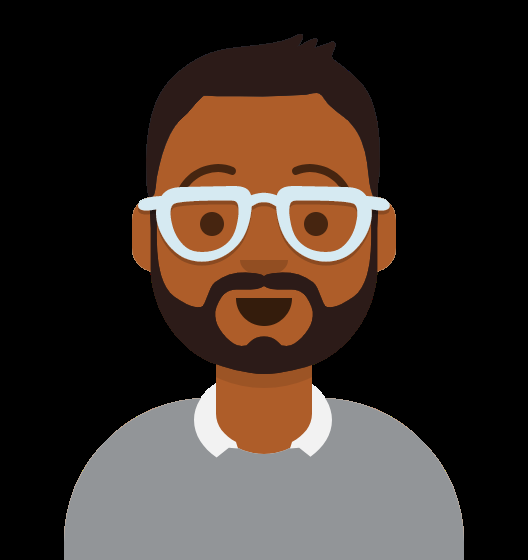

In [ ]:
cv2_imshow(image_list[3])

In [ ]:
images_matrix = [[[[] for k in range(image_list[0].shape[2])] for j in range(image_list[0].shape[1])] for i in range(image_list[0].shape[0])]

for image in image_list:
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        for k in range(image.shape[2]):
          images_matrix[i][j][k].append(image[i][j][k])


In [ ]:
def pixel_proba(counter: dict, denom_add: int = 11):
    denominator = sum(counter.values())

    proba_list = [(num + 1) / (denominator + denom_add) for num in counter.values()]
    return list(counter.keys()), proba_list

In [ ]:
from collections import Counter

def generate_image(data: list) -> np.array:
    image = [[[[] for k in range(image_list[0].shape[2])] for j in range(image_list[0].shape[1])] for i in range(image_list[0].shape[0])]
    for i in range(len(data)):
        for j in range(len(data[0])):
            for k in range(len(data[0][0])):
                sample = data[i][j][k]
                value_counts = Counter(sample)

                values, proba_list = pixel_proba(value_counts)
                image[i][j][k] = random.choices(
                                        population=values,
                                        weights=proba_list,
                                        )[0]

    return np.array(image)

In [ ]:
os.makedirs('examples')

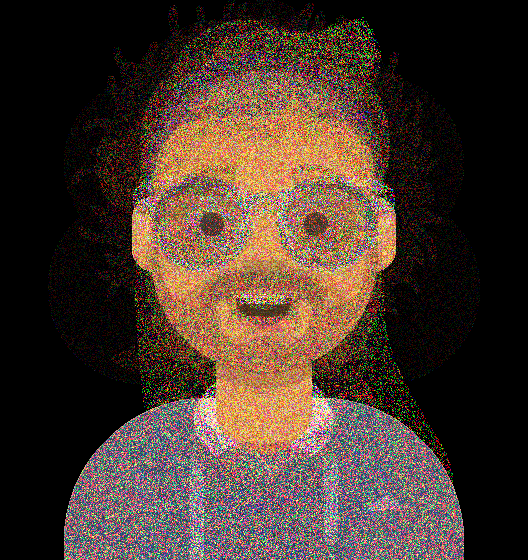

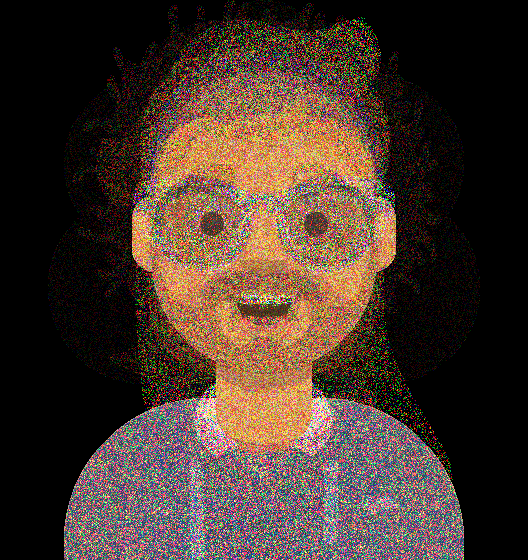

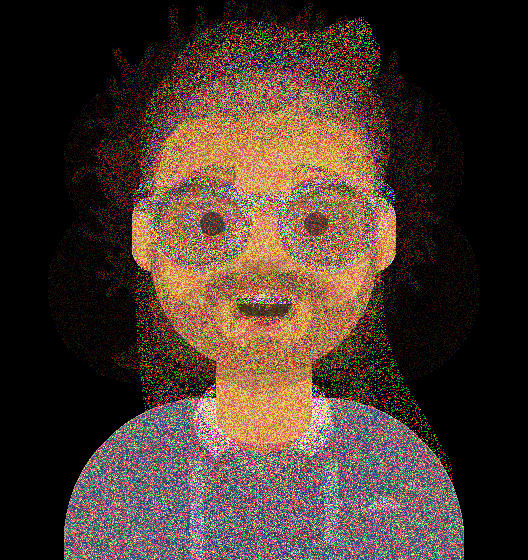

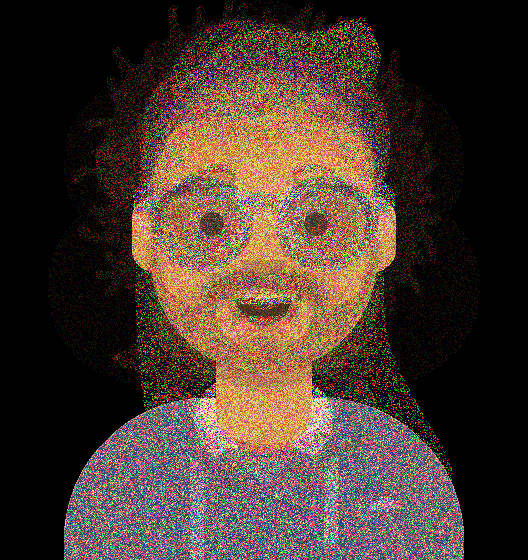

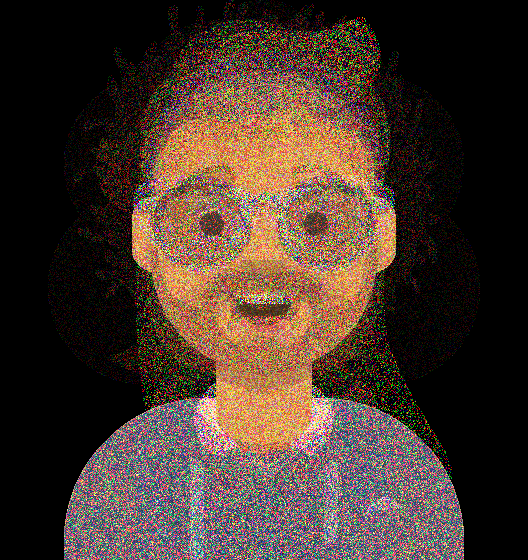

In [ ]:
for i in range(5):
  im = generate_image(images_matrix)
  cv2_imshow(im)
  cv2.imwrite(f'examples/{i}.png', im)